In [1]:
import pandas as pd
import numpy as np

In [2]:
# Read in datasets
all_reviews = pd.read_csv('all_reviews_merged.csv')

In [7]:
# Drop the 'train_test' column
all_reviews = all_reviews.drop('train_test', axis=1)

In [3]:
# Add attribute columns
all_reviews['sustainability (y/n)'] = 0

In [4]:
# Preview Data
all_reviews

,reviewId,asin,date_cleaned,username,title,keyword,verified,rating_cleaned,text,train_test,sustainability (y/n)
0,R18NC04B57B1WM,B09LRY9C88,2022-04-08,Tina Adcox,awesome!,Movie,True,5.0,great movie,test,0
1,R1MPI8QQ1R4QZY,B09LRY9C88,2022-04-08,Amazon Customer,boring and ridiculous!,Movie,True,1.0,The plot. Gave up after 20 minutes. Does anyon...,test,0
2,R31HH2207Z6W8A,B09LRY9C88,2022-04-08,Hydman,Cool,Movie,True,5.0,Greatovie but over hyped,test,0
3,R36RICDJG8MPW1,B09LRY9C88,2022-04-08,M. Fields,Great movie,Movie,True,5.0,Do buy this film. It really is great but don't...,test,0
4,R3BBWMNCFP15OM,B09LRY9C88,2022-04-08,Bama Road Rage,I was never a fan of the spider-man franchise,Movie,True,2.0,...and I'm still not a fan after watching this...,test,0
...,...,...,...,...,...,...,...,...,...,...,...
1115232,R2R6K97W4CDB3X,B08C2X57ZH,2019-09-16,Claudio,NaN,best Watch,True,5.0,"L'orologio è molto bello, non solo in consider...",test,0
1115233,R1BNSB3WLR7SGQ,B08C2X57ZH,2019-09-15,marco,NaN,best Watch,True,5.0,"AMAZON professionali come sempre, sono piacevo...",test,0
1115234,R1R10QW28I1RIE,B08C2X57ZH,2019-09-07,Anna,NaN,best Watch,True,5.0,Very impressed with the quality and look would...,test,0
1115235,R2FF892TZK2DZO,B08C2X57ZH,2019-08-14,Cliente Amazon,NaN,best Watch,True,4.0,Bello.ma da utilizzare senza impegno,test,0


In [6]:
# Sample 3,000 random rows
sample_size = 3000

In [7]:
# Randomly select 1500 rows
sampled_reviews = all_reviews.sample(n=sample_size, random_state=42)

In [8]:
# Save dataset
sampled_reviews.to_csv('all_reviews_merged_3000_sample.csv', index=False)
print('Saved as CSV.')

Saved as CSV.


In [11]:
sampled_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 707251 to 157807
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   reviewId              3000 non-null   object 
 1   asin                  3000 non-null   object 
 2   date_cleaned          3000 non-null   object 
 3   username              3000 non-null   object 
 4   title                 2825 non-null   object 
 5   keyword               3000 non-null   object 
 6   verified              3000 non-null   bool   
 7   rating_cleaned        3000 non-null   float64
 8   text                  3000 non-null   object 
 9   train_test            3000 non-null   object 
 10  sustainability (y/n)  3000 non-null   int64  
dtypes: bool(1), float64(1), int64(1), object(8)
memory usage: 260.7+ KB


In [ ]:
##start ESGERT MODEL

In [12]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline
 
tokenizer_name = "ESGBERT/EnvironmentalBERT-environmental" #path to download from HF
model_name = "ESGBERT/EnvironmentalBERT-environmental"
# the tokenizer prepares the text for the model and the model classifies the text-
 
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(tokenizer_name, max_len=512)
# The pipeline combines tokenizer and model to one process. 
pipe = pipeline("text-classification", model=model, tokenizer=tokenizer) # set device=0 to use GPU
 
# See https://huggingface.co/docs/transformers/main_classes/pipelines#transformers.pipeline
print(pipe("Scope 1 emissions are reported here on a like-for-like basis against the 2013 baseline and exclude emissions from additional vehicles used during repairs.", padding=True, truncation=True))

config.json:   0%|          | 0.00/951 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

/home/jupyter-svanhemert00/.local/lib/python3.9/site-packages/torch/_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


tokenizer_config.json:   0%|          | 0.00/351 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

[{'label': 'environmental', 'score': 0.9979760050773621}]


In [21]:
#get sample data to test pipeline 
test = sampled_reviews.iloc[0:10,8]
test_list = test.tolist()
print(test)
#made text into a list, wasn't working as a dataframe
print(test_list)

707251     Bought these in hopes to decrease buying apple...
454036     I bought Vivoactive 3 to replace my Polar. I h...
1064972    I’ve had this less then a month and the pump h...
938522                     Bought these and they're perfect!
905362     I had to return my first one because I got a d...
468680     This is listed as a reverse weave and it is no...
441345     I like how easy they are to clean the hair off...
28254      These don’t work….at all. Nothing I did worked...
124182                                Insurance .enough said
194392                     Great watch and priced very well.
Name: text, dtype: object
['Bought these in hopes to decrease buying applesauce pouches. While yes they do work, they tend to leak after a day or 2 in the fridge. Washing isn’t too terrible, just difficult to make sure they dry completely.', 'I bought Vivoactive 3 to replace my Polar. I have it for 1 week. I tested GPS accuracy and heart rate accuracy (against the Polar with a chest stra

In [23]:
# You can input single sentences or arrays of sentences into the pipeline.
test_list
sentences_test = pipe(test_list)
print(sentences_test)

[{'label': 'none', 'score': 0.9904944896697998}, {'label': 'none', 'score': 0.9915618300437927}, {'label': 'none', 'score': 0.9949518442153931}, {'label': 'none', 'score': 0.9936698079109192}, {'label': 'none', 'score': 0.9934735894203186}, {'label': 'none', 'score': 0.9934743046760559}, {'label': 'none', 'score': 0.9943811297416687}, {'label': 'none', 'score': 0.9717317223548889}, {'label': 'none', 'score': 0.9937148690223694}, {'label': 'none', 'score': 0.9950385689735413}]


In [42]:
# Classify subset of sentences.
# The padding and trunctuation parameters help us with classifying texts of different length.
sub_sentences = test_list[:100] # takes around 20 seconds
# full sentences take around 5mins WITHOUT GPU (see next tutorial for speed ups)
env = pipe(sub_sentences, padding=True, truncation=True)

# You might only want the labels.
env_labels = [x["label"] for x in env]

In [43]:
import pandas as pd

# Let's look at the results. We use a dataframe for this purpose.
data_env = pd.DataFrame({"sentence": sub_sentences, "environmental": env_labels})
# Which sentences are labeled as environmental?
data_env[data_env["environmental"] == "environmental"]

,sentence,environmental


               sentence
environmental          
none                 10


<AxesSubplot:xlabel='environmental'>

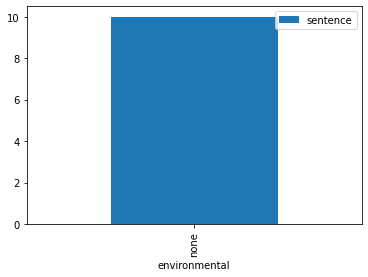

In [45]:
print(data_env.groupby("environmental").count())
data_env.groupby("environmental").count().plot(kind="bar")